In [33]:
!pip install sunpy[all]

In [64]:
import os
from astropy.io import fits
import sunpy.map
#from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator


In [252]:
folder_path = "/home/anu/Desktop/samapti/carrington"
save_dir1="/home/anu/Desktop/samapti/carrington/South hemisphere"
save_dir2= "/home/anu/Desktop/samapti/carrington/North hemisphere"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
print(fits_files)

['/home/anu/Desktop/samapti/carrington/synop_Mr_0.1960.fits']


In [253]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data
    #print(header)
    #print(data)

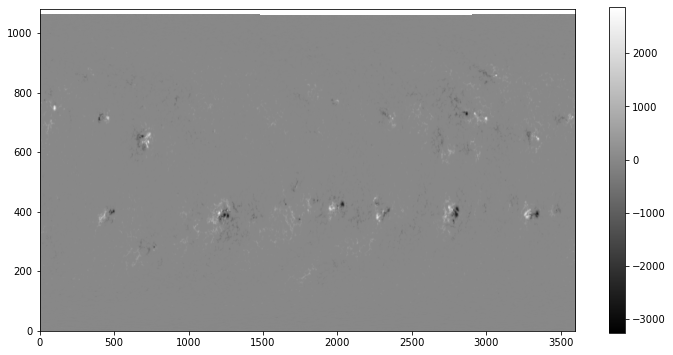

In [254]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=2)              #vmax=100, vmin=-100
plt.colorbar()

In [255]:
nx=data.shape[1]
ny=data.shape[0]


In [256]:
longitude=[]
longitude_rad=[]
sinlat=[]
latitude=[]
R_sun = 6.96e10
d_sinlat=2/(ny-1)
dtr=np.pi/180
rtd=180/np.pi



for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  d_sinlat=2/(ny-1)
  Latitude =np.arcsin(sin_lat)*rtd
  Latitude_rad=  (Latitude*dtr)
  latitude.append(Latitude)
  sinlat.append(sin_lat)
for j in range(nx):
    Longitude = 0+j*(360/(nx-1))
    Longitude_rad=Longitude*dtr
    d_lon=360/(nx-1)
    dlon_rad=d_lon*dtr
    longitude.append(Longitude)
    longitude_rad.append(Longitude_rad)
  
Flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
#print( longitude_rad[1:6])

1.5675631727393676e+16


In [92]:
print(np.subtract(longitude_rad[2:7], longitude_rad[1:6]))

[0.00174581 0.00174581 0.00174581 0.00174581 0.00174581]


In [93]:

print(sinlat[999:1001])

[0.8517145505097312, 0.8535681186283597]


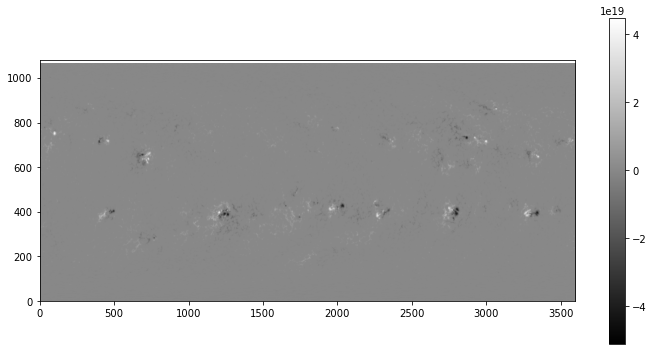

In [257]:
fig = plt.figure(figsize=(12,6))



plt.imshow(Flux,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()






In [258]:
lon=np.linspace(min(longitude), max(longitude), 1000)
lat= np.linspace(min(latitude), max(latitude),1000)
x,y=np.meshgrid(lon, lat)
flux= RegularGridInterpolator((latitude,longitude),Flux)((y,x))
Sinlat=np.linspace(min(sinlat), max(sinlat),1000)
X,Y=np.meshgrid(lon, Sinlat )
flux1= RegularGridInterpolator((sinlat,longitude),Flux)((Y,X))




In [42]:
#print(lon)

/tmp/ipykernel_30669/2849679009.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,flux, cmap='gray')
/tmp/ipykernel_30669/2849679009.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,flux1, cmap='gray')     #, vmin=-1e19,vmax=1e19)


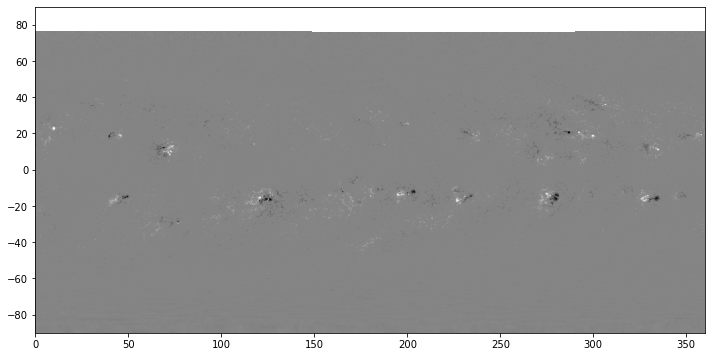

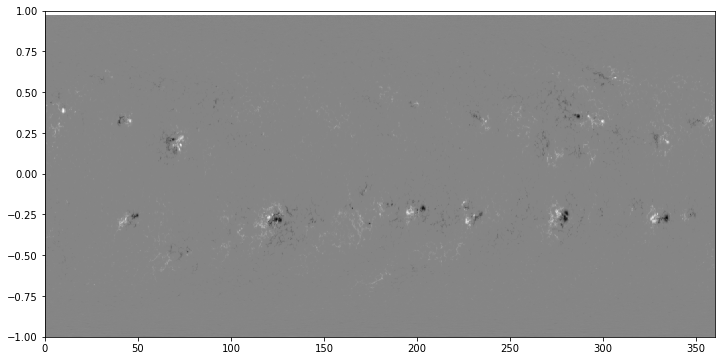

In [259]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y,flux, cmap='gray')
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(X,Y,flux1, cmap='gray')     #, vmin=-1e19,vmax=1e19)
#plt.colorbar()

In [239]:
fluxthres=0.5e19
binary_mask=np.abs(flux)>fluxthres
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))
sizes1 = ndimage.sum(binary_mask, labeled_array)
areathres=50
mask_filtered = np.zeros_like(binary_mask)

print(sizes1)


6269


In [139]:
for i, size in enumerate(sizes):
    #print(f"{i+1}  {size}")
    
    if size >=areathres:
       mask_filtered[labeled_array == (i + 1)] = 1


[]


/tmp/ipykernel_30669/812874150.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask, cmap='gray')


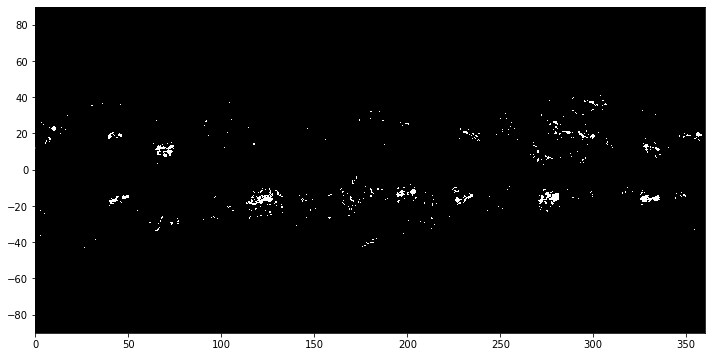

In [107]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask, cmap='gray')



In [374]:
totflux=ndimage.sum(flux, labeled_array, range(1, num_features + 1))
#totflux1=ndimage.sum(flux, labeled_array)
#print(totflux1)
Totflux= np.zeros_like(flux)
#print(Totflux)
for i, val in enumerate(totflux):
    Totflux[labeled_array == (i + 1)] = val
#print(totflux1)



/tmp/ipykernel_30669/3909787639.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, Totflux, cmap='gray')


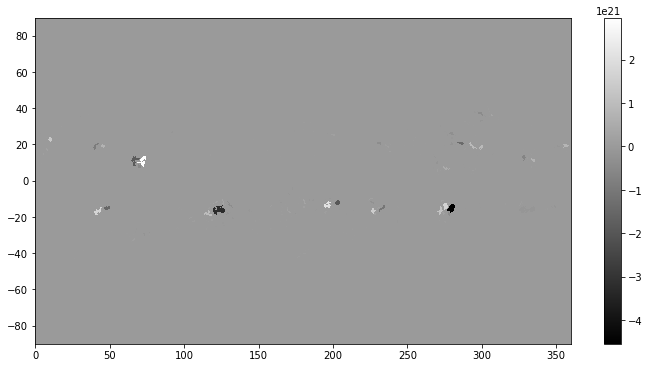

In [375]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, Totflux, cmap='gray')
plt.colorbar()

In [403]:
regionthres = 2e20
binary_mask2=np.abs(Totflux)>regionthres
#print(binary_mask2.shape)
#print(x.shape)


/tmp/ipykernel_30669/2989830348.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, binary_mask2, cmap='gray')


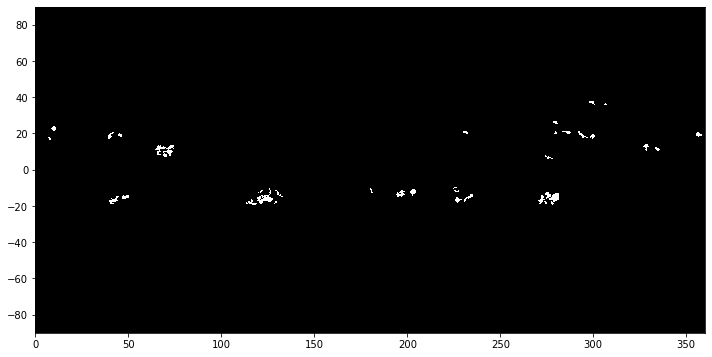

In [404]:
fig=plt.figure(figsize=(12,6))
plt.pcolormesh(x,y, binary_mask2, cmap='gray')

In [405]:
y_indices, x_indices = np.where(binary_mask2==1)

Lat=lat[y_indices]
Lon=lon[x_indices]
mask1=(Lat<=0)& (Lat>=-90)
SH_lat=Lat[mask1]
SH_lon=Lon[mask1]
mask2= (Lat<=90) & (Lat>=0)
NH_lat = Lat[mask2]
NH_lon = Lon[mask2]

sorted_indices1= np.argsort(SH_lon)

SHlon_sorted=SH_lon[sorted_indices1]
SHlat_sorted=SH_lat[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
#print(SH_lon)
#print(sorted_indices1)
#print(output1)
sorted_indices2 = np.argsort(NH_lon)
NHlon_sorted= NH_lon[sorted_indices2]
NHlat_sorted = NH_lat[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
#print(output2)

In [406]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

In [407]:
folder_path3="/home/anu/Desktop/samapti/carrington/North hemisphere"
NFiles = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]

for NFile in txt_files:
	print(NFile)

/home/anu/Desktop/samapti/carrington/North hemisphere/ synop_Mr_0.1960_NH.txt


In [408]:
with open (NFile, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      Nfhi=float(parts[0])
      Nfhi_rad= Nfhi*dtr
      Nlamda=float(parts[1])
    
      A.append(Nfhi)
      B.append(Nlamda)
     

In [409]:
N=np.array(A)

In [464]:
def Nmodel(lon,a,b,c):
  S = (lon*np.pi)/180
  return a+b*np.sin(S+c)                          
params, cov = curve_fit(Nmodel,N,B,method = 'trf')                                               #method = 'trf'
print(f"a = {params[0]}, b = {params[1]}, c= {params[2]}")
perr = np.sqrt(np.diag(cov))
print(perr)
print(params)

a = 14.790886698869661, b = 6.086299730231988, c= 2.449370165937484
[0.27344658 0.35289349 0.06025528]
[14.7908867   6.08629973  2.44937017]


In [465]:
np.linalg.cond(cov)

136.61323188542553

In [466]:
Y1=Nmodel(N, *params)
#print(Y1)
b=np.subtract(B,Y1)
#print(b)
Nmean=np.mean(b**2)
print(Nmean)
Nrms=np.sqrt(Nmean)
print(Nrms)

34.83401854910741
5.902035119270929


In [467]:
error1=model(lon, *params)+Nrms
error2=model(lon, *params)-Nrms
#print(error2)
#print(error1)

/tmp/ipykernel_30669/1422129320.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray')


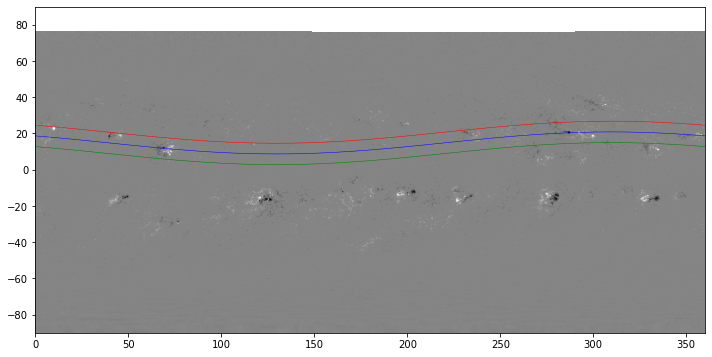

In [468]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Nmodel(lon, *params), color="blue", linewidth=0.5)
#plt.plot (lon,model(lon, *error1), linewidth=1)
#plt.plot (lon,model(lon, *error2), linewidth=1)

plt.pcolormesh(x,y, flux, cmap='gray')



plt.plot(lon,error1, color="red",linewidth=0.5)

plt.plot(lon,error2, color="green",linewidth=0.5)





In [417]:
folder_path3="/home/anu/Desktop/samapti/carrington/South hemisphere"
SFiles = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
P=[]
Q=[]

for Sfile in txt_files:
	print(Sfile)

/home/anu/Desktop/samapti/carrington/South hemisphere/ synop_Mr_0.1960_SH.txt


In [418]:
with open (Sfile, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      Sfhi=float(parts[0])
      Slamda=float(parts[1])
      
      P.append(Sfhi)
      Q.append(Slamda)

In [419]:
M=np.array(P)

In [469]:
def Smodel(lon,p,q,r):
  S= (lon*np.pi)/180
  return p+q*np.sin(S+r)
Params, Cov = curve_fit(Smodel,M,Q,method = 'trf')
print(f"p = {Params[0]}, q = {Params[1]}, r={Params[2]}")
Perr = np.sqrt(np.diag(Cov))
#print(Cov)
#print(Perr)
#print(Params)

p = -15.755416632730237, q = -1.52829934096891, r=1.2282821475271193


In [470]:
np.linalg.cond(Cov)

5.513269826377907

In [484]:
SY=Smodel(M, *Params)
print(SY)
SQ=np.subtract(Q,SY)
print(SQ)
Smean=np.mean(SQ**2)
print(Smean)
Srms=np.sqrt(Smean)
print(Srms)

[-17.19141114 -17.19141114 -17.19141114 ... -15.53788112 -15.53788112
 -15.53788112]
[-0.5563366  -1.63741768 -0.37615642 ...  1.93427752  1.2135568
  0.49283608]
3.5701828034884806
1.8894927370827548


In [486]:
Error1=Smodel(lon, *Params)+Srms
Error2=Smodel(lon, *Params)-Srms
#print(Error2)
#print(Error1)

/tmp/ipykernel_30669/4017798809.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray')


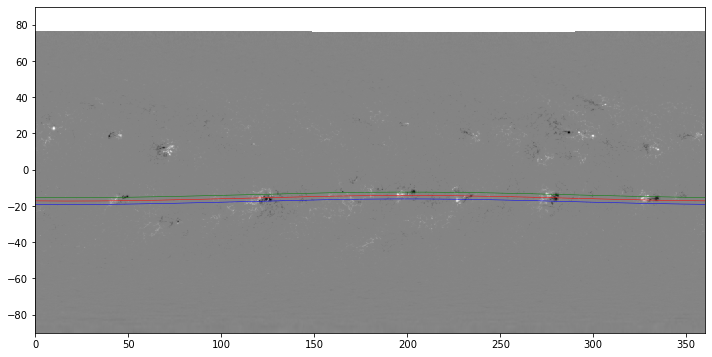

In [487]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel(lon, *Params), color="Red" ,linewidth=0.5)
#plt.plot (lon,model(lon, *Error1) ,color="g",linewidth=0.5)
#plt.plot (lon,model(lon, *Error2) ,linewidth=0.5)
plt.plot(lon,Error1, color="green",linewidth=0.5)
plt.plot(lon,Error2, color="blue",linewidth=0.5)
plt.pcolormesh(x,y, flux, cmap='gray')
#plt.plot(M,Y2, color="green")

/tmp/ipykernel_30669/3350509683.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray', vmin= -1e19, vmax=1e19)


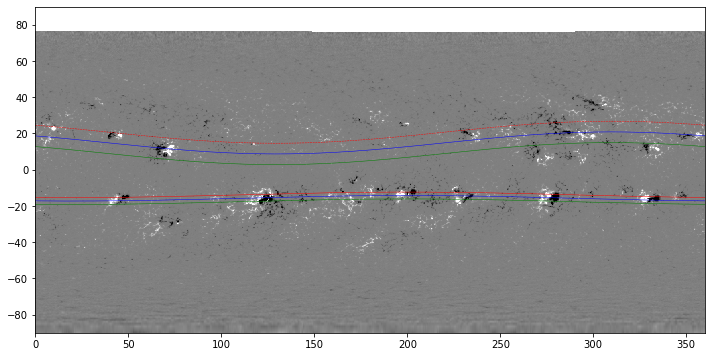

In [489]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel(lon, *Params), color="blue" ,linewidth=0.5)
plt.plot(lon,Error1, color="red",linewidth=0.5)
plt.plot(lon,Error2, color="green",linewidth=0.5)
#plt.plot (lon,model(lon, *Error1) ,color="g",linewidth=0.5)
#plt.plot (lon,model(lon, *Error2) ,linewidth=0.5)

plt.plot (lon,Nmodel(lon, *params), color="blue", linewidth=0.5)
plt.plot(lon,error1, color="red",linewidth=0.5, linestyle="--")
plt.plot(lon,error2, color="green",linewidth=0.5)
#plt.plot (lon,model(lon, *error1), color="g", linewidth=0.5)
#plt.plot (lon,model(lon, *error2), linewidth=0.5)

plt.pcolormesh(x,y, flux, cmap='gray', vmin= -1e19, vmax=1e19)

In [475]:
def Nmodel2(lon,a2,b2,c2,d2,e2):
  S = (lon*np.pi)/180
  return a2+b2*np.sin(S+c2)+ d2*np.sin(S+e2)                         
params2, cov2 = curve_fit(Nmodel2,N,B,method = 'trf')                                               #method = 'trf'
print(f"a2 = {params2[0]}, b2 = {params2[1]}, c2= {params2[2]},d2= {params2[3]},e2= {params2[4]}")
#perr = np.sqrt(np.diag(cov))
#print(perr)
print(params2)

a2 = 14.79088670657581, b2 = -6.395951160798352, c2= 5.793527489482055,d2= 1.2991118591745794,e2= 7.023587603940671
[14.79088671 -6.39595116  5.79352749  1.29911186  7.0235876 ]


In [476]:
NY2=Nmodel2(N, *params2)
#print(Y1)
b2=np.subtract(B,NY2)
#print(b)
Nmean2=np.mean(b2**2)
print(Nmean2)
Nrms2=np.sqrt(Nmean2)
print(Nrms2)

34.83401855024552
5.902035119367346


In [477]:
error3=Nmodel2(lon, *params2)+Nrms2
error4=Nmodel2(lon, *params2)-Nrms2

/tmp/ipykernel_30669/1156621244.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray')


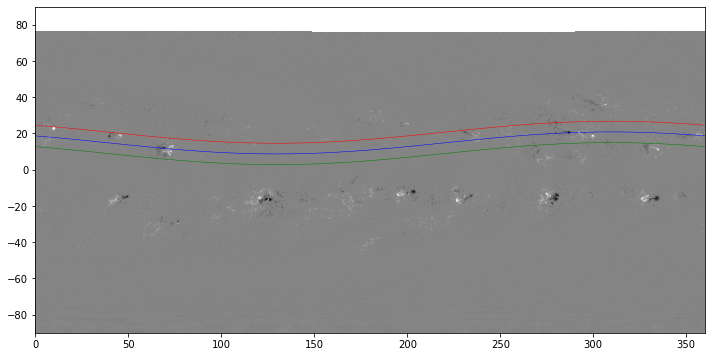

In [478]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Nmodel2(lon, *params2), color="blue", linewidth=0.5)
#plt.plot (lon,model(lon, *error1), linewidth=1)
#plt.plot (lon,model(lon, *error2), linewidth=1)

plt.pcolormesh(x,y, flux, cmap='gray')



plt.plot(lon,error3, color="red",linewidth=0.5)

plt.plot(lon,error4, color="green",linewidth=0.5)


In [479]:
def Smodel2(lon,p2,q2,r2,s2,t2):
  S= (lon*np.pi)/180
  return p2+q2*np.sin(S+r2)+s2*np.sin(S+t2)
Params2, Cov2 = curve_fit(Smodel2,M,Q,method = 'trf')
print(f"p2 = {Params2[0]}, q2 = {Params2[1]}, r2={Params2[2]},s2={Params2[3]},t2={Params2[4]}")
#Perr = np.sqrt(np.diag(Cov))

p2 = -15.755416627624891, q2 = -0.7821673523103153, r2=1.2420012770930213,s2=-0.7462628552542024,t2=1.213951181550573


In [480]:
SY2=Smodel2(M, *Params2)
print(SY2)
SQ2=np.subtract(Q,SY2)
print(SQ2)
Smean2=np.mean(SQ2**2)
print(Smean2)
Srms2=np.sqrt(Smean2)
print(Srms2)

[-17.19138061 -17.19138061 -17.19138061 ... -15.53791953 -15.53791953
 -15.53791953]
[-0.55636714 -1.63744822 -0.37618696 ...  1.93431592  1.2135952
  0.49287448]
3.5701828045538666
1.8894927373646786


In [482]:
Error3=Smodel2(lon, *Params2)+Srms2
Error4=Smodel2(lon, *Params2)-Srms2

/tmp/ipykernel_30669/2775017804.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y, flux, cmap='gray', vmin= -1e19, vmax=1e19)


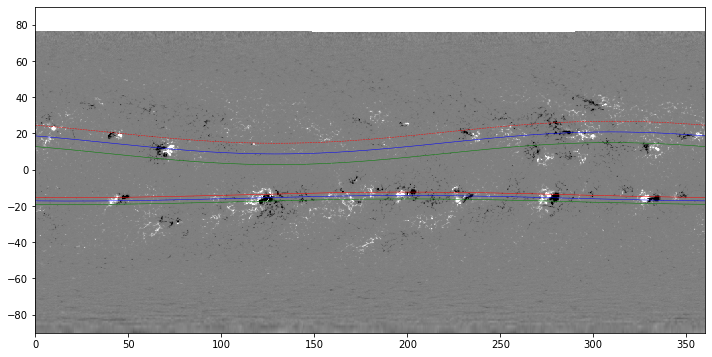

In [488]:
fig = plt.figure(figsize=(12,6))
plt.plot (lon,Smodel2(lon, *Params2), color="blue" ,linewidth=0.5)
plt.plot(lon,Error3, color="red",linewidth=0.5)
plt.plot(lon,Error4, color="green",linewidth=0.5)
#plt.plot (lon,model(lon, *Error1) ,color="g",linewidth=0.5)
#plt.plot (lon,model(lon, *Error2) ,linewidth=0.5)

plt.plot (lon,Nmodel2(lon, *params2), color="blue", linewidth=0.5)
plt.plot(lon,error3, color="red",linewidth=0.5, linestyle="--")
plt.plot(lon,error4, color="green",linewidth=0.5)
#plt.plot (lon,model(lon, *error1), color="g", linewidth=0.5)
#plt.plot (lon,model(lon, *error2), linewidth=0.5)

plt.pcolormesh(x,y, flux, cmap='gray', vmin= -1e19, vmax=1e19)